In [1]:
import numpy as np 
import pandas as pd 
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections

from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")

Using TensorFlow backend.


In [2]:
df=pd.read_csv('creditcard.csv')

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [5]:
df.isnull().values.any()

False

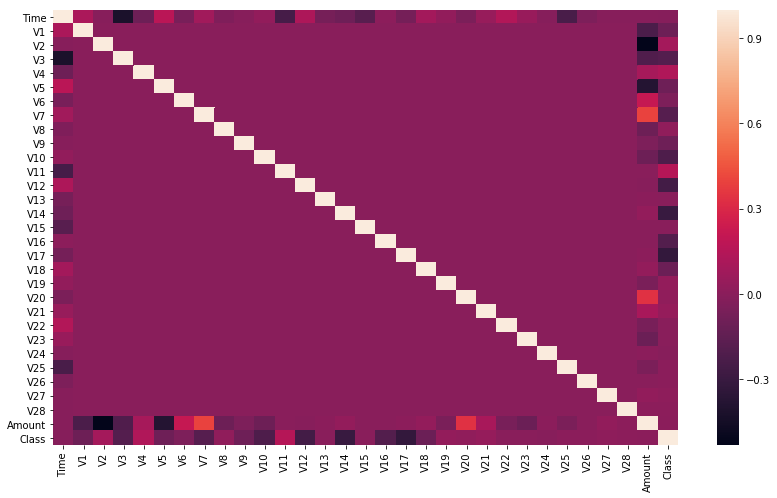

In [6]:
fig, ax= plt.subplots(figsize=(14,8))
hm=df.corr()
sns.heatmap(hm,ax=ax)
plt.show()

In [7]:
df.shape

(284807, 31)

In [8]:
Fraud = df[df['Class']==1]
Valid = df[df['Class']==0]
outlier_fraction = len(Fraud)/float(len(Valid))
print(outlier_fraction)
print("Fraud Cases : {}".format(len(Fraud)))
print("Valid Cases : {}".format(len(Valid)))

0.0017304750013189597
Fraud Cases : 492
Valid Cases : 284315


In [9]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Text(0,0.5,'Frequency')

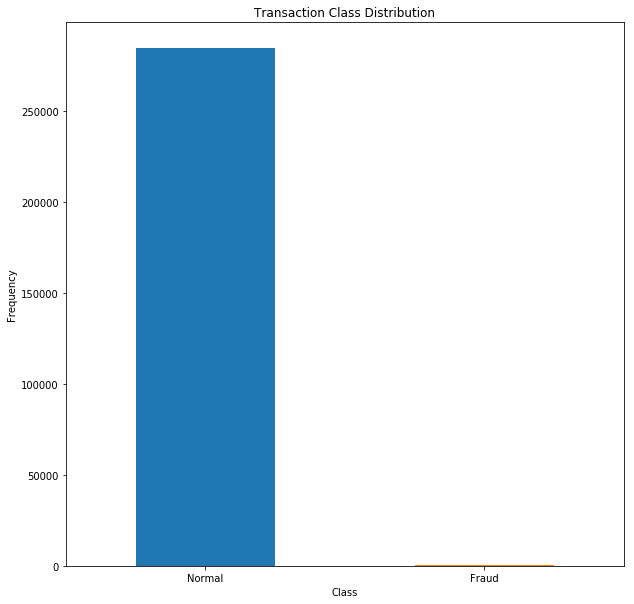

In [11]:
plt.subplots(figsize=(10,10))
LABELS = ["Normal", "Fraud"]
count_classes = pd.value_counts(df['Class'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction Class Distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency")

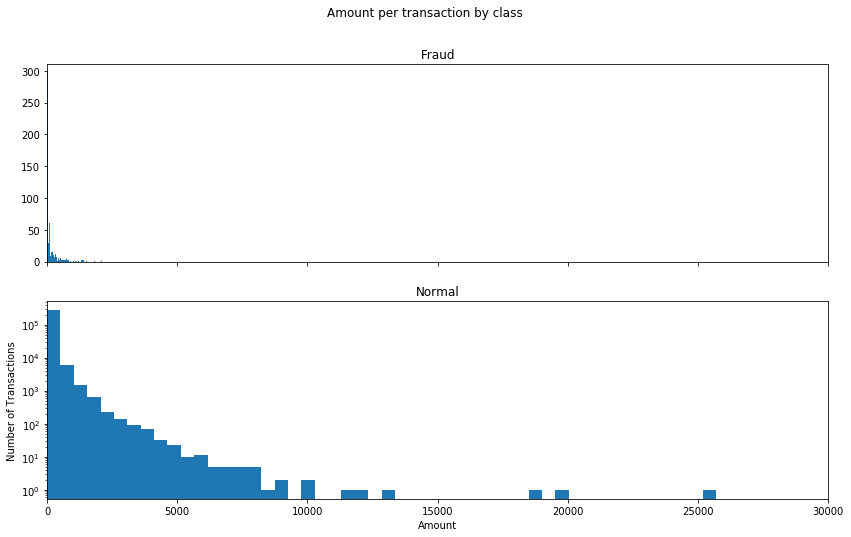

In [12]:
from pylab import rcParams
rcParams['figure.figsize'] = 14, 8
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')
bins = 50
ax1.hist(Fraud.Amount, bins = bins)
ax1.set_title('Fraud')
ax2.hist(Valid.Amount, bins = bins)
ax2.set_title('Normal')
plt.xlabel('Amount')
plt.ylabel('Number of Transactions')
plt.xlim((0, 30000))
plt.yscale('log')
plt.show();

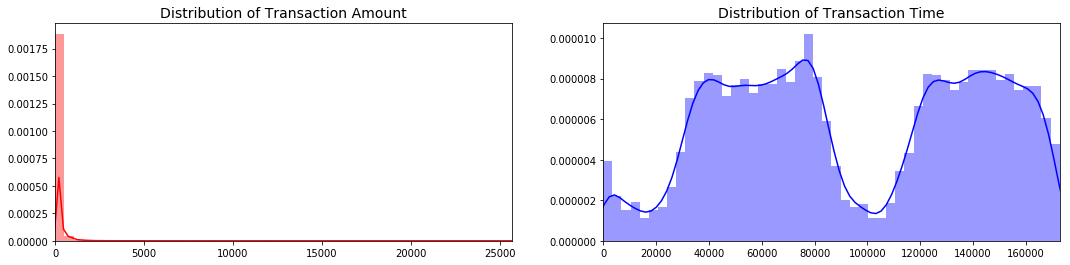

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = df['Amount'].values
time_val = df['Time'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])



plt.show()

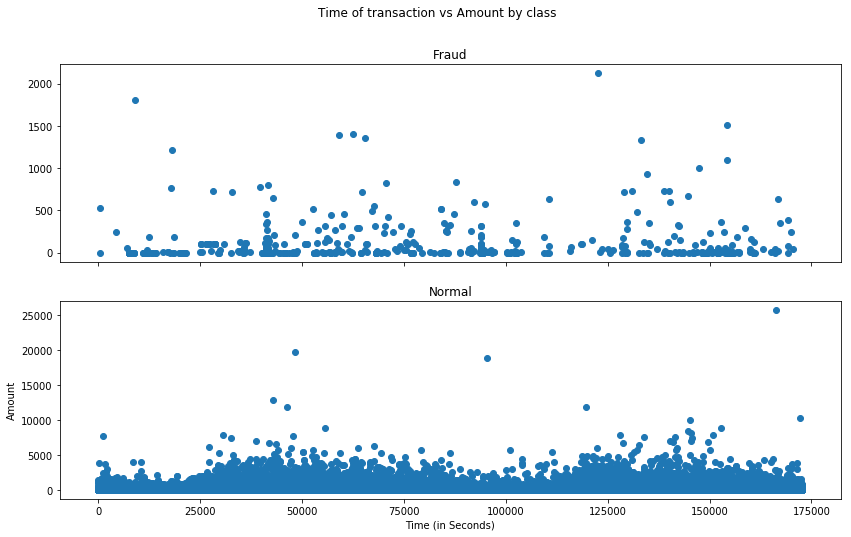

In [14]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')
ax1.scatter(Fraud.Time, Fraud.Amount)
ax1.set_title('Fraud')
ax2.scatter(Valid.Time, Valid.Amount)
ax2.set_title('Normal')
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

In [17]:
# Since most of our data has already been scaled we should scale the columns that are left to scale (Amount and Time)
from sklearn.preprocessing import StandardScaler, RobustScaler

# RobustScaler is less prone to outliers.

std_scaler = StandardScaler()
rob_scaler = RobustScaler()

df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time','Amount'], axis=1, inplace=True)

In [18]:
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,1.783274,-0.994983
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.269825,-0.994983
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,4.983721,-0.994972
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,1.418291,-0.994972
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,0.670579,-0.994960
5,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,...,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,0,-0.256131,-0.994960
6,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,-0.099254,...,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,0,-0.237686,-0.994937
7,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,1.249376,...,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,0,0.262698,-0.994901
8,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,-0.410430,...,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,0,0.994900,-0.994901
9,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,-0.366846,...,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,0,-0.255991,-0.994878


In [19]:
scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']

df.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
df.insert(0, 'scaled_amount', scaled_amount)
df.insert(1, 'scaled_time', scaled_time)

# Amount and Time are Scaled!

df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


## Downsample

In [27]:
df = df.sample(frac=1)

# amount of fraud classes 492 rows.
fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0][:492]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
data = normal_distributed_df.sample(frac=1, random_state=42)

data.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
38546,11.725285,-0.531738,-6.367732,-7.696783,0.671828,0.288148,0.201930,-0.356995,-0.570521,1.119369,...,3.403491,1.120657,-0.052203,1.777009,-0.340465,0.577296,-0.346256,0.012759,-0.711306,0
44556,-0.293440,-0.501662,-4.566342,3.353451,-4.572028,3.616119,-2.493138,-1.090000,-5.551433,0.447783,...,-0.249128,2.674466,-0.020880,-0.302447,-0.086396,-0.516060,-0.295102,0.195985,0.141115,1
67966,1.369384,-0.375040,0.941652,-1.154517,1.480220,1.232143,-1.738628,0.635237,-1.088364,0.340693,...,-0.452748,-0.543987,-0.884849,0.057872,0.366212,0.227404,-0.406742,0.105619,0.056886,0
241445,-0.157898,0.779344,-3.818214,2.551338,-4.759158,1.636967,-1.167900,-1.678413,-3.144732,1.245106,...,0.164453,0.837685,0.761712,-0.417694,-0.469712,-0.225934,0.586415,-0.348107,0.087777,1
23308,-0.307413,-0.610980,0.287953,1.728735,-1.652173,3.813544,-1.090927,-0.984745,-2.202318,0.555088,...,0.265250,0.262202,-0.633528,0.092891,0.187613,0.368708,-0.132474,0.576561,0.309843,1


Text(0,0.5,'Frequency')

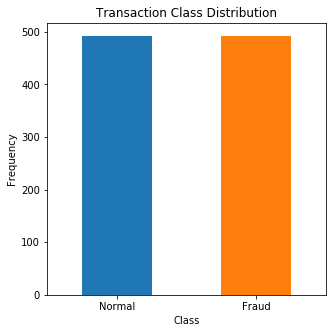

In [28]:
plt.subplots(figsize=(5,5))
LABELS = ["Normal", "Fraud"]
count_classes = pd.value_counts(data['Class'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction Class Distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency")

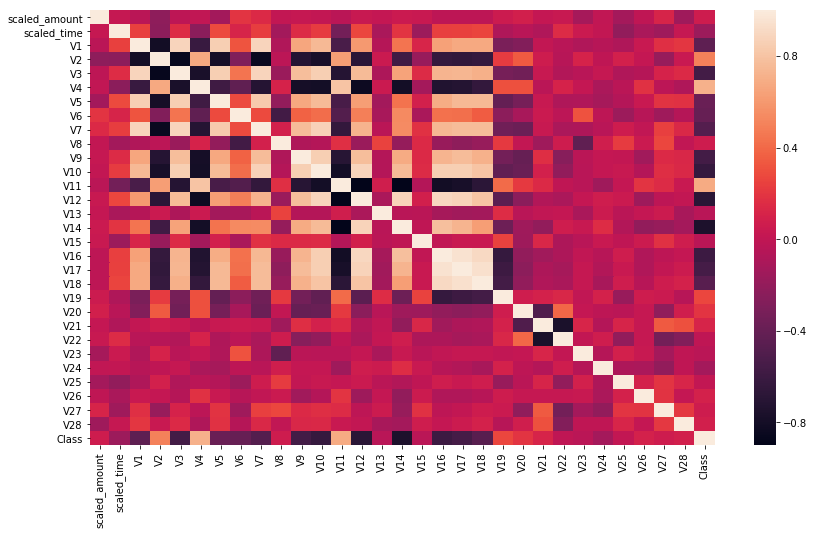

In [26]:
fig, ax= plt.subplots(figsize=(14,8))
hm=new_df.corr()
sns.heatmap(hm,ax=ax)
plt.show()

In [30]:
X=data.iloc[:,0:30]
X=X.values
y=data.iloc[:,30]
y=y.values

In [32]:
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

In [45]:
def plot_roc(y_test,prob):
    fpr, tpr, thresholds = roc_curve(y_test, probs)
    plt.figure(figsize=(16,4))
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.plot(fpr, tpr, marker='.')
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.title("ROC curve")
    plt.xlabel('false positive rate')
    plt.ylabel('true positive rate')
    plt.show()

### Extreme gradient boost

In [72]:
from xgboost import XGBClassifier
model = XGBClassifier()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
model=model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9507692307692308


In [73]:
results = confusion_matrix(y_test, y_pred) 
print ('Confusion Matrix :')
print(results) 
print ('Accuracy Score :',accuracy_score(y_test, y_pred)) 
print ('Report : ')
print (classification_report(y_test, y_pred) )

Confusion Matrix :
[[147   4]
 [ 12 162]]
Accuracy Score : 0.9507692307692308
Report : 
              precision    recall  f1-score   support

           0       0.92      0.97      0.95       151
           1       0.98      0.93      0.95       174

    accuracy                           0.95       325
   macro avg       0.95      0.95      0.95       325
weighted avg       0.95      0.95      0.95       325



In [74]:
TN=results[0][0]
FN= results[1][0]
TP = results[1][1]
FP= results[0][1]

TPR = TP/(TP+FN)
print("TPR:", TPR*100)

FPR = FP/(FP+TN)
print("FPR:", FPR*100)

TNR = TN/(TN+FP)
print("TNR: ", TNR*100)

FPR = 1-TNR
print("FPR:", FPR*100)

cost = (100*FN) + 10*(FP+TP)
print("cost", cost)

TPR: 93.10344827586206
FPR: 2.6490066225165565
TNR:  97.35099337748345
FPR: 2.6490066225165587
cost 2860


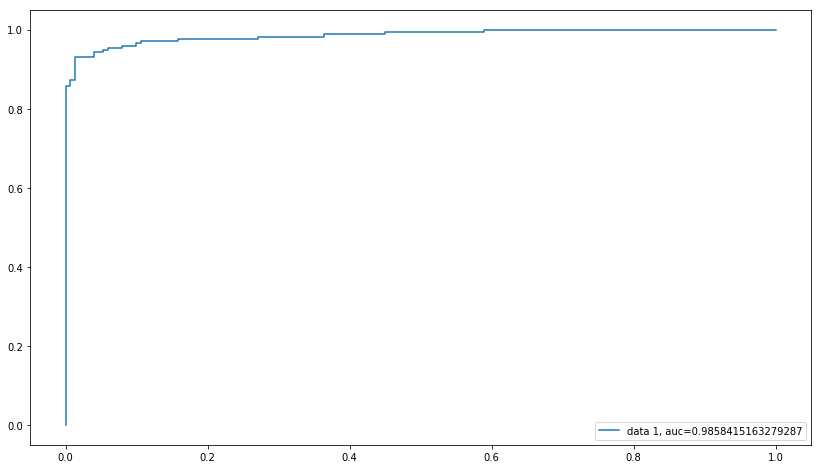

In [75]:
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

### Isolation forest

In [50]:
data


,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
38546,11.725285,-0.531738,-6.367732,-7.696783,0.671828,0.288148,0.201930,-0.356995,-0.570521,1.119369,...,3.403491,1.120657,-0.052203,1.777009,-0.340465,0.577296,-0.346256,0.012759,-0.711306,0
44556,-0.293440,-0.501662,-4.566342,3.353451,-4.572028,3.616119,-2.493138,-1.090000,-5.551433,0.447783,...,-0.249128,2.674466,-0.020880,-0.302447,-0.086396,-0.516060,-0.295102,0.195985,0.141115,1
67966,1.369384,-0.375040,0.941652,-1.154517,1.480220,1.232143,-1.738628,0.635237,-1.088364,0.340693,...,-0.452748,-0.543987,-0.884849,0.057872,0.366212,0.227404,-0.406742,0.105619,0.056886,0
241445,-0.157898,0.779344,-3.818214,2.551338,-4.759158,1.636967,-1.167900,-1.678413,-3.144732,1.245106,...,0.164453,0.837685,0.761712,-0.417694,-0.469712,-0.225934,0.586415,-0.348107,0.087777,1
23308,-0.307413,-0.610980,0.287953,1.728735,-1.652173,3.813544,-1.090927,-0.984745,-2.202318,0.555088,...,0.265250,0.262202,-0.633528,0.092891,0.187613,0.368708,-0.132474,0.576561,0.309843,1
162125,-0.257388,0.354280,0.137472,0.961121,-0.430986,-0.535354,0.858462,-0.853283,0.910511,-0.061091,...,-0.029470,-0.351549,-0.908638,0.106114,0.536012,-0.445240,0.116501,0.216223,0.082628,0
199820,-0.279746,0.569274,2.066209,0.131432,-1.874851,0.182951,0.755355,-0.266555,0.107456,-0.087706,...,-0.095750,-0.338749,-0.879439,0.261064,0.010719,-0.206185,0.182510,-0.063827,-0.044403,0
15166,1.089779,-0.683384,-18.474868,11.586381,-21.402917,6.038515,-14.451158,-4.146524,-14.856124,12.431140,...,1.577924,1.741136,-1.251138,-0.396219,0.095706,1.322751,-0.217955,1.628793,0.482248,1
136174,-0.251659,-0.036572,-0.405102,1.040741,1.153876,-0.182630,0.453671,0.006482,0.544755,0.218474,...,0.121947,-0.202609,-0.501631,-0.039692,-0.352492,-0.210672,0.103587,0.259314,0.081982,0
270235,-0.269825,0.931531,0.094254,0.926006,0.026982,-0.757890,0.839579,-0.705956,1.067877,-0.223513,...,0.050785,-0.294009,-0.611580,-0.029571,-0.632493,-0.361260,0.177598,0.253372,0.092662,0


In [51]:
from sklearn.ensemble import IsolationForest
X=data.iloc[:,0:30]
X=X.values
y=data.iloc[:,30]
y=y.values

clf=IsolationForest(n_estimators=100, max_samples=len(X), contamination=outlier_fraction,random_state=42, verbose=0)
clf.fit(X)
scores_prediction = clf.decision_function(X)
y_pred = clf.predict(X)

In [55]:
y_pred[y_pred == 1] = 0
y_pred[y_pred == -1] = 1
n_errors = (y_pred != y).sum()
 
print("{}: {}".format("Isolation Forest",n_errors))
results = confusion_matrix(y, y_pred) 
print ('Confusion Matrix :')
print(results) 
print("Accuracy Score :",accuracy_score(y,y_pred))
print("Classification Report :")
print(classification_report(y,y_pred))

Isolation Forest: 492
Confusion Matrix :
[[492   0]
 [492   0]]
Accuracy Score : 0.5
Classification Report :
              precision    recall  f1-score   support

           0       0.50      1.00      0.67       492
           1       0.00      0.00      0.00       492

    accuracy                           0.50       984
   macro avg       0.25      0.50      0.33       984
weighted avg       0.25      0.50      0.33       984



### Fast ai

In [58]:
from fastai.tabular import *

In [59]:
from sklearn.metrics import roc_auc_score

def auroc_score(input, target):
    input, target = input.cpu().numpy()[:,1], target.cpu().numpy()
    return roc_auc_score(target, input)

class AUROC(Callback):
    _order = -20 #Needs to run before the recorder

    def __init__(self, learn, **kwargs): self.learn = learn
    def on_train_begin(self, **kwargs): self.learn.recorder.add_metric_names(['AUROC'])
    def on_epoch_begin(self, **kwargs): self.output, self.target = [], []
    
    def on_batch_end(self, last_target, last_output, train, **kwargs):
        if not train:
            self.output.append(last_output)
            self.target.append(last_target)
                
    def on_epoch_end(self, last_metrics, **kwargs):
        if len(self.output) > 0:
            output = torch.cat(self.output)
            target = torch.cat(self.target)
            preds = F.softmax(output, dim=1)
            metric = auroc_score(preds, target)
            return add_metrics(last_metrics, [metric])


In [60]:
train_df = data

In [63]:
cont_names = ['scaled_amount','scaled_time','V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28',]

dep_var='Class'
procs=[ Normalize]

In [64]:
data = (TabularList.from_df(train_df, cont_names=cont_names , procs=procs,)
                .split_subsets(train_size=0.8, valid_size=0.2, seed=34)
                .label_from_df(cols=dep_var)
                .databunch())

In [65]:
learn = tabular_learner(data, layers=[200,100],metrics=accuracy, callback_fns=AUROC)

In [66]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


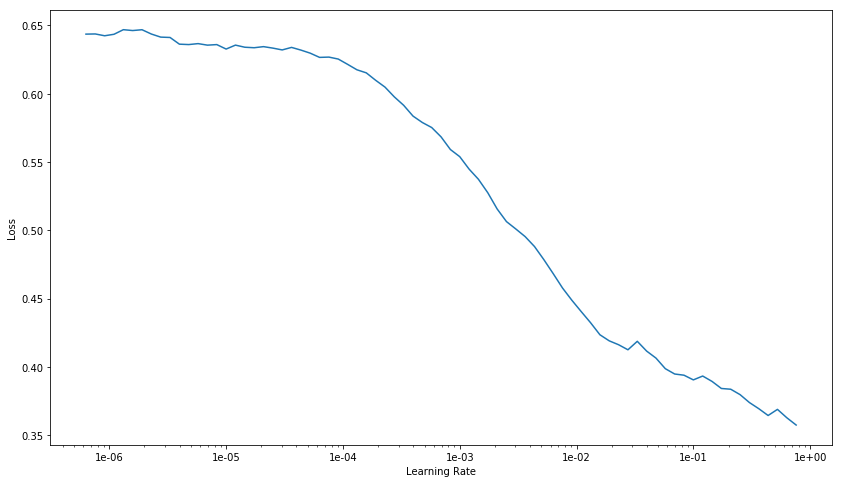

In [67]:
learn.recorder.plot()

In [68]:
learn.fit_one_cycle(4, 1e-02)

epoch,train_loss,valid_loss,accuracy,AUROC,time
0,0.334948,0.214163,0.943878,0.992788,00:00
1,0.249264,0.198986,0.943878,0.982337,00:00
2,0.215757,0.151817,0.933673,0.988503,00:00
3,0.182593,0.153093,0.938776,0.989653,00:00


### Random forest

#### n estimators=100

In [76]:
from sklearn.ensemble import RandomForestClassifier
random_clf=RandomForestClassifier(n_estimators=100)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
random_clf = random_clf.fit(X_train,y_train)
y_pred = random_clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9384615384615385


In [77]:
results = confusion_matrix(y_test, y_pred) 
print ('Confusion Matrix :')
print(results) 
print ('Accuracy Score :',accuracy_score(y_test, y_pred)) 
print ('Report : ')
print (classification_report(y_test, y_pred) )

Confusion Matrix :
[[160   3]
 [ 17 145]]
Accuracy Score : 0.9384615384615385
Report : 
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       163
           1       0.98      0.90      0.94       162

    accuracy                           0.94       325
   macro avg       0.94      0.94      0.94       325
weighted avg       0.94      0.94      0.94       325



In [78]:
TN=results[0][0]
FN= results[1][0]
TP = results[1][1]
FP= results[0][1]

TPR = TP/(TP+FN)
print("TPR:", TPR*100)

FPR = FP/(FP+TN)
print("FPR:", FPR*100)

TNR = TN/(TN+FP)
print("TNR: ", TNR*100)

FPR = 1-TNR
print("FPR:", FPR*100)

cost = (100*FN) + 10*(FP+TP)
print("cost", cost)

TPR: 89.50617283950618
FPR: 1.8404907975460123
TNR:  98.15950920245399
FPR: 1.8404907975460127
cost 3180


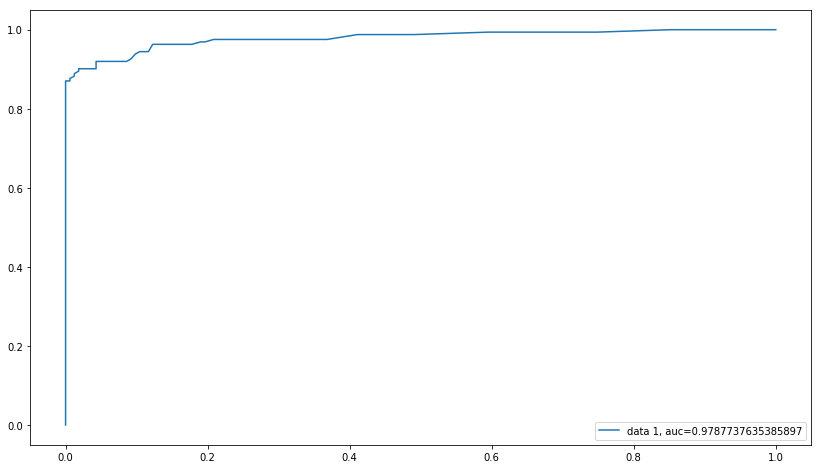

In [79]:
y_pred_proba = random_clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

### Support vector machine

In [86]:
from sklearn import svm
clf_svm = svm.SVC(kernel='linear')
clf_svm=svm.SVC(probability=True)
clf_svm.fit(X_train, y_train)
y_pred = clf_svm.predict(X_test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
clf_svm = clf_svm.fit(X_train,y_train)
y_pred = clf_svm.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9384615384615385


In [87]:
results = confusion_matrix(y_test, y_pred) 
print ('Confusion Matrix :')
print(results) 
print ('Accuracy Score :',accuracy_score(y_test, y_pred)) 
print ('Report : ')
print (classification_report(y_test, y_pred) )

Confusion Matrix :
[[163   2]
 [ 18 142]]
Accuracy Score : 0.9384615384615385
Report : 
              precision    recall  f1-score   support

           0       0.90      0.99      0.94       165
           1       0.99      0.89      0.93       160

    accuracy                           0.94       325
   macro avg       0.94      0.94      0.94       325
weighted avg       0.94      0.94      0.94       325



In [88]:
TN=results[0][0]
FN= results[1][0]
TP = results[1][1]
FP= results[0][1]

TPR = TP/(TP+FN)
print("TPR:", TPR*100)

FPR = FP/(FP+TN)
print("FPR:", FPR*100)

TNR = TN/(TN+FP)
print("TNR: ", TNR*100)

FPR = 1-TNR
print("FPR:", FPR*100)

cost = (100*FN) + 10*(FP+TP)
print("cost", cost)

TPR: 88.75
FPR: 1.2121212121212122
TNR:  98.7878787878788
FPR: 1.2121212121212088
cost 3240


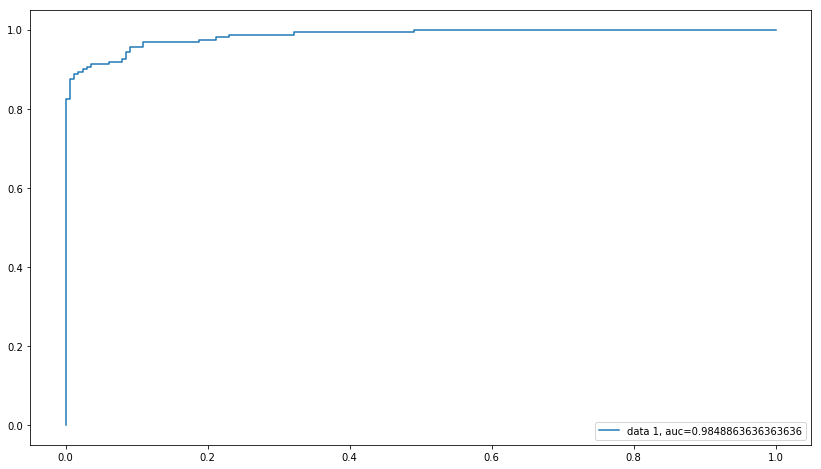

In [89]:
y_pred_proba = clf_svm.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

### Logistic Regression

In [90]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
logreg = logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9538461538461539


In [91]:
results = confusion_matrix(y_test, y_pred) 
print ('Confusion Matrix :')
print(results) 
print ('Accuracy Score :',accuracy_score(y_test, y_pred)) 
print ('Report : ')
print (classification_report(y_test, y_pred) )

Confusion Matrix :
[[151   5]
 [ 10 159]]
Accuracy Score : 0.9538461538461539
Report : 
              precision    recall  f1-score   support

           0       0.94      0.97      0.95       156
           1       0.97      0.94      0.95       169

    accuracy                           0.95       325
   macro avg       0.95      0.95      0.95       325
weighted avg       0.95      0.95      0.95       325



In [92]:
TN=results[0][0]
FN= results[1][0]
TP = results[1][1]
FP= results[0][1]

TPR = TP/(TP+FN)
print("TPR:", TPR*100)

FPR = FP/(FP+TN)
print("FPR:", FPR*100)

TNR = TN/(TN+FP)
print("TNR: ", TNR*100)

FPR = 1-TNR
print("FPR:", FPR*100)

cost = (100*FN) + 10*(FP+TP)
print("cost", cost)

TPR: 94.0828402366864
FPR: 3.205128205128205
TNR:  96.7948717948718
FPR: 3.205128205128205
cost 2640


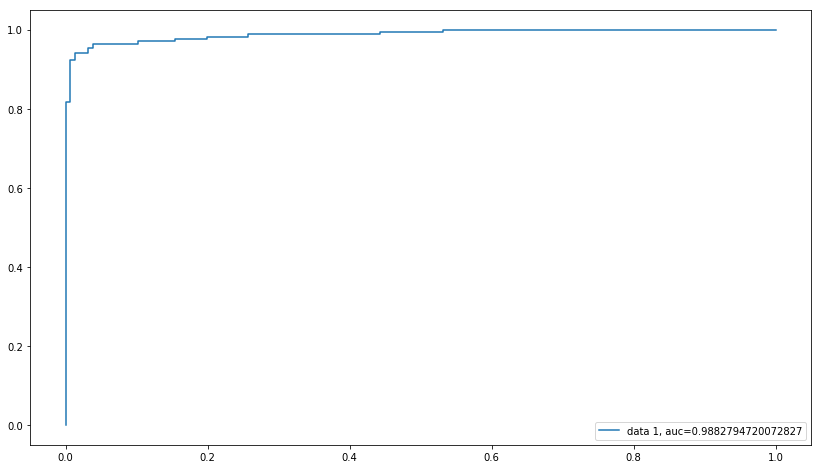

In [93]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()